In [1]:
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as hcluster
from sklearn.cluster import AgglomerativeClustering


In [2]:
titanic_path = 'titanic-cleandata.csv'

In [3]:
df = pd.read_csv(titanic_path)

In [4]:
df.describe()

,Pclass,Sex,SibSp,Parch
count,891.000000,891.000000,891.000000,891.000000
mean,2.308642,1.352413,0.523008,0.381594
std,0.836071,0.477990,1.102743,0.806057
min,1.000000,1.000000,0.000000,0.000000
25%,2.000000,1.000000,0.000000,0.000000
50%,3.000000,1.000000,0.000000,0.000000
75%,3.000000,2.000000,1.000000,0.000000
max,3.000000,2.000000,8.000000,6.000000


In [5]:
corr_matrix = df.corr()

<Axes: >

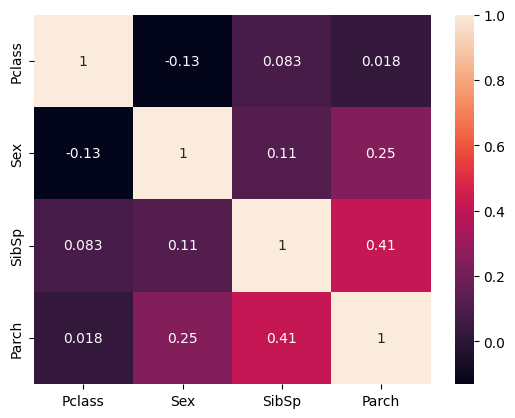

In [6]:
sns.heatmap(corr_matrix,annot=True)

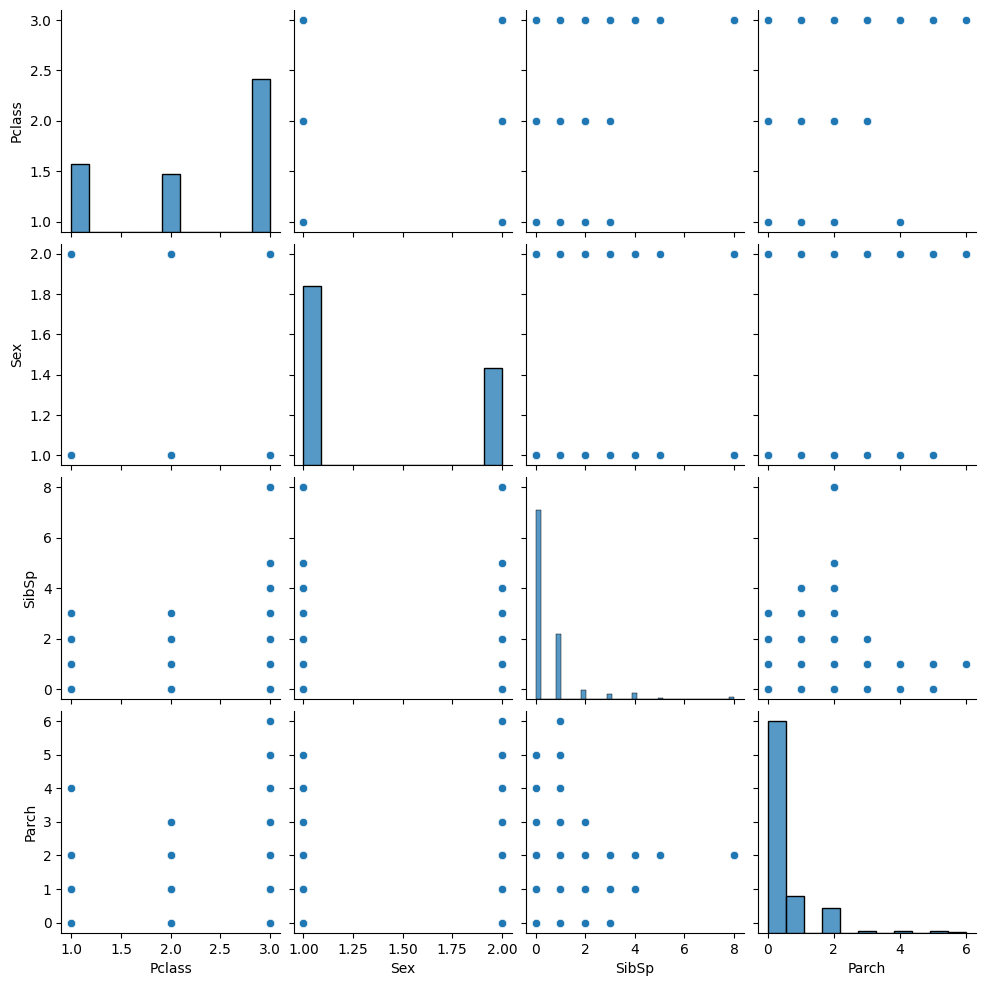

In [7]:
sns.pairplot(df)

In [8]:
scaling = StandardScaler()

In [9]:
scaled=scaling.fit_transform(df)

In [10]:
scaled_df=pd.DataFrame(scaled,columns=df.columns)

In [11]:
scaled_df.head()

,Pclass,Sex,SibSp,Parch
0,0.827377,-0.737695,0.432793,-0.473674
1,-1.566107,1.355574,0.432793,-0.473674
2,0.827377,1.355574,-0.474545,-0.473674
3,-1.566107,1.355574,0.432793,-0.473674
4,0.827377,-0.737695,-0.474545,-0.473674


In [12]:
corr_matrix = df.corr()

<Axes: >

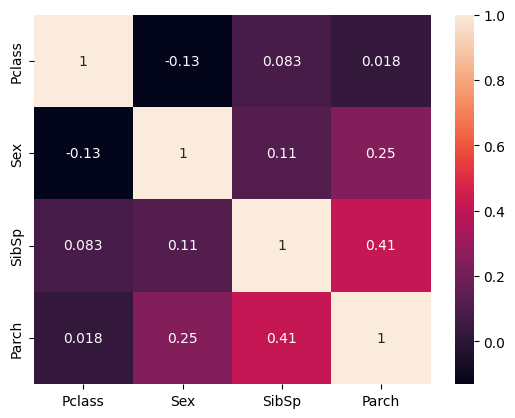

In [13]:
sns.heatmap(corr_matrix,annot=True)

In [14]:
df.describe()


,Pclass,Sex,SibSp,Parch
count,891.000000,891.000000,891.000000,891.000000
mean,2.308642,1.352413,0.523008,0.381594
std,0.836071,0.477990,1.102743,0.806057
min,1.000000,1.000000,0.000000,0.000000
25%,2.000000,1.000000,0.000000,0.000000
50%,3.000000,1.000000,0.000000,0.000000
75%,3.000000,2.000000,1.000000,0.000000
max,3.000000,2.000000,8.000000,6.000000


In [15]:
df.describe()


,Pclass,Sex,SibSp,Parch
count,891.000000,891.000000,891.000000,891.000000
mean,2.308642,1.352413,0.523008,0.381594
std,0.836071,0.477990,1.102743,0.806057
min,1.000000,1.000000,0.000000,0.000000
25%,2.000000,1.000000,0.000000,0.000000
50%,3.000000,1.000000,0.000000,0.000000
75%,3.000000,2.000000,1.000000,0.000000
max,3.000000,2.000000,8.000000,6.000000


In [16]:
kmeans = KMeans(n_clusters = 5,random_state=42)

In [18]:
kmeans.fit(scaled_df)

/home/user/Downloads/data_class/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5, random_state=42)

In [19]:
df.describe()


,Pclass,Sex,SibSp,Parch
count,891.000000,891.000000,891.000000,891.000000
mean,2.308642,1.352413,0.523008,0.381594
std,0.836071,0.477990,1.102743,0.806057
min,1.000000,1.000000,0.000000,0.000000
25%,2.000000,1.000000,0.000000,0.000000
50%,3.000000,1.000000,0.000000,0.000000
75%,3.000000,2.000000,1.000000,0.000000
max,3.000000,2.000000,8.000000,6.000000


/home/user/Downloads/data_class/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/user/Downloads/data_class/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/user/Downloads/data_class/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/user/Downloads/data_class/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default 

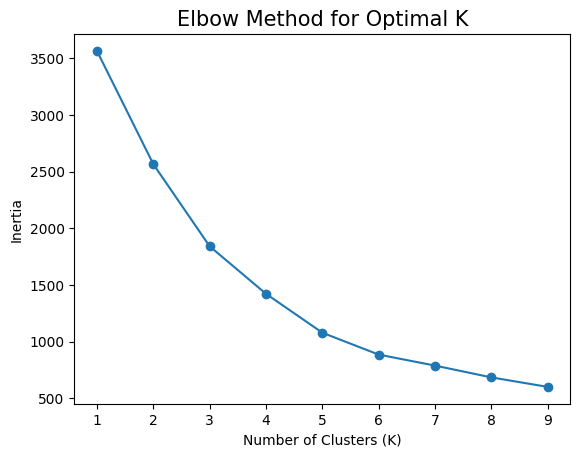

In [25]:
a = []  # Initialize an empty list to store inertia values
for i in K:
    K = range(1,10)
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(scaled_df)
    a.append(kmeans.inertia_)


plt.plot(K, a, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K',fontsize=15)
plt.show()


In [ ]:
kmeans = KMeans(n_clusters=5,random_state=42)

In [ ]:
kmeans.fit(scaled_df)

In [ ]:
pd.Series(kmeans.labels_).value_counts()

In [26]:
metrics.silhouette_score(df,kmeans.labels_)

0.49543668975812916

In [27]:
preds = kmeans.labels_
kmeans_df = pd.DataFrame(df)
kmeans_df['KMeans_Clusters'] = preds
kmeans_df.head(10)

,Pclass,Sex,SibSp,Parch,KMeans_Clusters
0,3,1,1,0,5
1,1,2,1,0,4
2,3,2,0,0,0
3,1,2,1,0,4
4,3,1,0,0,5
5,3,1,0,0,5
6,1,1,0,0,1
7,3,1,3,1,2
8,3,2,0,2,3
9,2,2,1,0,0


In [28]:
kmeans_df.to_csv('kmeans_titanic.csv',index= False)

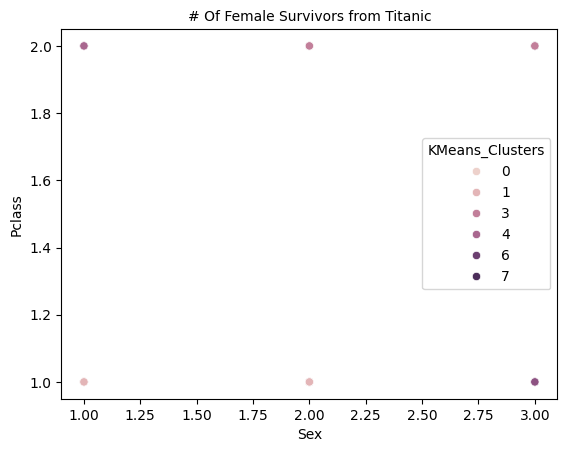

In [30]:
sns.scatterplot(x=kmeans_df['Pclass'],y=kmeans_df['Sex'],hue=kmeans_df ['KMeans_Clusters'])
plt.title("# Of Female Survivors from Titanic",fontsize = 10)
plt.xlabel("Sex",fontsize=10)
plt.ylabel("Pclass",fontsize = 10)
plt.show()
                